In [10]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
import statistics
%matplotlib inline

In [ ]:
# Define constants for argon
mass_argon = 39.948  # Atomic mass of argon in atomic mass units (AMU)
sigma_argon = 3.4  # Lennard-Jones sigma parameter for argon in Angstrom
epsilon_argon = 0.238  # Lennard-Jones epsilon parameter for argon in eV
rcut_argon = 2.5 * sigma_argon  # Cutoff distance for LJ potential for argon in Angstrom

In [2]:
# Define constants
#sigma = 0.34 nm
#epsilon/kb = 120 K
dt = 0.001  # Time step
steps = 1000  # Number of steps
mass = 1.0  # Mass of particles
epsilon = 1.0  # Lennard-Jones potential parameter
sigma = 1.0  # Lennard-Jones potential parameter
rcut = 2.5 * sigma  # Cutoff distance for LJ potential
box_size = 10.0  # Size of the simulation box
num_particles = 10  # Number of particles

# Initialize positions and velocities randomly
positions = np.random.uniform(0, box_size, size=(num_particles, 3))
velocities = np.random.normal(0, 1, size=(num_particles, 3))

def lj_pot(r): #Lennard-Jones potential
    return 4*epsilon*((sigma/r)**12 - (sigma/r)**6)

def lj_force(r):
    return 4*epsilon*(12*(sigma**12)/(r**13) - 6*(sigma**6)/(r**7))

# Main simulation loop
for step in range(steps):
    # Calculate forces
    forces = np.zeros_like(positions)
    potential_energy = 0.0

    for i in range(num_particles):
        for j in range(i + 1, num_particles):
            rij = positions[j] - positions[i]
            rij = rij - np.rint(rij / box_size) * box_size  # Apply periodic boundary conditions
            r = np.linalg.norm(rij)

            if r < rcut:
                f = lj_force(r) * rij / r
                forces[i] += f
                forces[j] -= f
                potential_energy += lj_pot(r)

    # Update positions and velocities using Verlet algorithm
    positions += velocities * dt + 0.5 * forces / mass * dt ** 2
    velocities += 0.5 * forces / mass * dt

    # Apply periodic boundary conditions
    positions = positions % box_size

    # Calculate kinetic energy
    kinetic_energy = 0.5 * mass * np.sum(velocities ** 2)

    # Print energies every 100 steps
    if step % 100 == 0:
        print("Step:", step, "Potential Energy:", potential_energy, "Kinetic Energy:", kinetic_energy)



Step: 0 Potential Energy: -0.24733249024235773 Kinetic Energy: 20.6465157408524
Step: 100 Potential Energy: -0.39341447529952683 Kinetic Energy: 20.63982434928129
Step: 200 Potential Energy: -0.5659194287590009 Kinetic Energy: 20.636368726687877
Step: 300 Potential Energy: -0.6832137879253313 Kinetic Energy: 20.63285781662106
Step: 400 Potential Energy: -0.7318546009034924 Kinetic Energy: 20.626292809665586
Step: 500 Potential Energy: -0.8397697805538752 Kinetic Energy: 20.62993690196823
Step: 600 Potential Energy: -1.1501958656809352 Kinetic Energy: 20.689886738122798
Step: 700 Potential Energy: -1.352203476094503 Kinetic Energy: 21.32517291856108
Step: 800 Potential Energy: -0.8197221617931434 Kinetic Energy: 27044840.093101114
Step: 900 Potential Energy: -1.6036852330767783 Kinetic Energy: 157660351516150.25


In [140]:
kb = 1.38065e-23 #J/K
tfinal = 100
DeltaT = .01
n = ceil(tfinal/DeltaT)
mass = 39.948*1.66054e-27  # Mass of particles
lattice_const = 5.26 #angstroms
#epsilon = 1.65e-21#.0103 #120*kb  #K
epsilon = 120*kb
sigma = .3405e-9 #m
cutoff = 5*sigma #2.5 * sigma  # Cutoff distance for LJ potential
box_size = 10*sigma #5.0e-9  # Size of the simulation box
num_particles = 10  # Number of particles
temperatures = np.linspace(30,120,5)
pot_temps = []
#temperature = 300
for temperature in temperatures:
    K = 1.5*temperature*kb
    v = np.sqrt(2*K/mass)
    def lj_pot(r): #lennard-jones potential
        return 4*epsilon*((sigma/r)**12 - (sigma/r)**6)

    def lj_force(r): #just negative derivate of potential wrt r
        return 4*epsilon*(12*(sigma**12)/(r**13) - 6*(sigma**6)/(r**7))

    t = np.zeros(n)
    positions = np.random.uniform(0, box_size, size=(num_particles, 3))
    velocities = np.empty(shape=(num_particles,3))
    velocities.fill(np.sqrt(2*K/(3*mass)))

    #plt.scatter(positions[:,0],positions[:,1])
    #plt.show()

    #potentials = np.zeros(n)
    #kinetics = np.zeros(n)
    # Start integrating using velocity verlet method
    for curr_step in range(n): #looping through number of steps
        accelerations = np.zeros_like(positions)
        curr_potential = 0

        for i in range(num_particles):
            for j in range(i+1,num_particles):
                r_ij = positions[j] - positions[i]
                r_ij -= np.rint(r_ij/box_size)*box_size
                #r_ij[0] = r_ij[0] % box_size
                #r_ij[1] = r_ij[1] % box_size
                #r_ij[2] = r_ij[2] % box_size
                r_mag = np.linalg.norm(r_ij)

                if(r_mag<cutoff):
                    force_directed = lj_force(r_mag)*(r_ij/r_mag)
                    accelerations[i] += force_directed/mass
                    accelerations[j] += -1*force_directed/mass
                    curr_potential += 2*np.abs(lj_pot(r_mag))

        #updates after calculated all of the accelerations
        for i in range(num_particles):
            positions[i] = positions[i] + DeltaT*velocities[i] + accelerations[i]*DeltaT*DeltaT/2
            velocities[i] = velocities[i] + .5*DeltaT*accelerations[i]
            t[i+1] = t[i] + DeltaT
            positions[i][0] = positions[i][0] % box_size
            positions[i][1] = positions[i][1] % box_size
            positions[i][2] = positions[i][2] % box_size

        #kinetics[curr_step] = .5*mass*np.sum(velocities*velocities)
        #potentials[curr_step] = curr_potential

    for i in range(num_particles):
        positions[i][0] = positions[i][0] % box_size
        positions[i][1] = positions[i][1] % box_size
        positions[i][2] = positions[i][2] % box_size
    pot_temps.append(curr_potential)

Text(0.5, 1.0, 'Argon Melting Point')

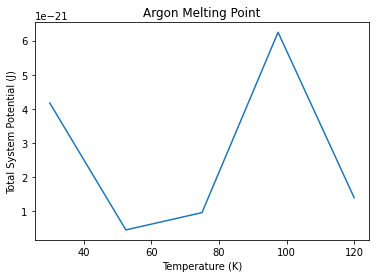

In [141]:
plt.plot(temperatures,pot_temps)
plt.xlabel("Temperature (K)")
plt.ylabel("Total System Potential (J)")
plt.title("Argon Melting Point")

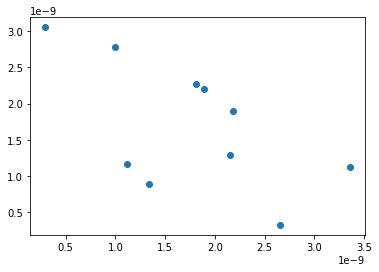

In [129]:
plt.scatter(positions[:,0],positions[:,1])

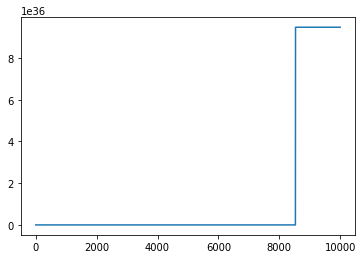

In [130]:
plt.plot(kinetics)

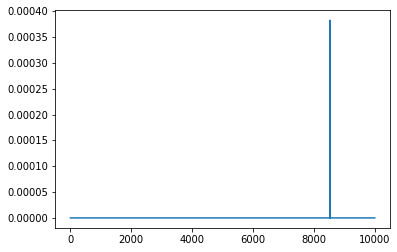

In [131]:
plt.plot(potentials)

In [126]:
print(potentials)

[9.33716414e-22 1.08637045e-21 5.78759212e-22 ... 1.48450878e-20
 1.40485095e-21 3.23015679e-22]


In [127]:
print(kinetics)

[1.44964153e-02 2.48327925e-02 2.82172661e-02 ... 7.20809217e+30
 7.20809217e+30 7.20809217e+30]


2.4894379092921634e-09


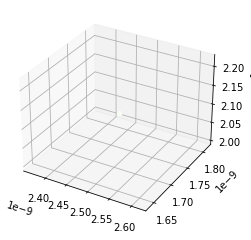

In [156]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
kb = 1.38065e-23 #J/K
tfinal = 100
DeltaT = .01
n = ceil(tfinal/DeltaT)
mass = 39.948*1.66054e-27  # Mass of particles
lattice_const = 5.26 #angstroms
#epsilon = 1.65e-21#.0103 #120*kb  #K
epsilon = 120*kb
sigma = .3405e-9 #m
cutoff = 5*sigma #2.5 * sigma  # Cutoff distance for LJ potential
box_size = 10*sigma #5.0e-9  # Size of the simulation box
num_particles = 25  # Number of particles
temperatures = np.linspace(30,120,5)
pot_temps = []
temperature = 100
K = 1.5*temperature*kb
v = np.sqrt(2*K/mass)
def lj_pot(r): #lennard-jones potential
    return 4*epsilon*((sigma/r)**12 - (sigma/r)**6)

def lj_force(r): #just negative derivate of potential wrt r
    return 4*epsilon*(12*(sigma**12)/(r**13) - 6*(sigma**6)/(r**7))

t = np.zeros(n)
positions = np.random.uniform(0, box_size, size=(num_particles, 3))
velocities = np.empty(shape=(num_particles,3))
velocities.fill(np.sqrt(2*K/(3*mass)))

#plt.scatter(positions[:,0],positions[:,1])
#plt.show()

#potentials = np.zeros(n)
#kinetics = np.zeros(n)
# Start integrating using velocity verlet method
for curr_step in range(n): #looping through number of steps
    accelerations = np.zeros_like(positions)
    curr_potential = 0

    for i in range(num_particles):
        for j in range(i+1,num_particles):
            r_ij = positions[j] - positions[i]
            r_ij -= np.rint(r_ij/box_size)*box_size
            #r_ij[0] = r_ij[0] % box_size
            #r_ij[1] = r_ij[1] % box_size
            #r_ij[2] = r_ij[2] % box_size
            r_mag = np.linalg.norm(r_ij)

            if(r_mag<cutoff):
                force_directed = lj_force(r_mag)*(r_ij/r_mag)
                accelerations[i] += force_directed/mass
                accelerations[j] += -1*force_directed/mass
                curr_potential += 2*np.abs(lj_pot(r_mag))

    #updates after calculated all of the accelerations
    for i in range(num_particles):
        positions[i] = positions[i] + DeltaT*velocities[i] + accelerations[i]*DeltaT*DeltaT/2
        velocities[i] = velocities[i] + .5*DeltaT*accelerations[i]
        t[i+1] = t[i] + DeltaT
        positions[i][0] = positions[i][0] % box_size
        positions[i][1] = positions[i][1] % box_size
        positions[i][2] = positions[i][2] % box_size

    #kinetics[curr_step] = .5*mass*np.sum(velocities*velocities)
    #potentials[curr_step] = curr_potential

for i in range(num_particles):
    positions[i][0] = positions[i][0] % box_size
    positions[i][1] = positions[i][1] % box_size
    positions[i][2] = positions[i][2] % box_size

fig = plt.figure()
ax = plt.axes(projection='3d')
xdata = positions[i][0]
ydata = positions[i][1]
zdata = positions[i][2]
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')
print(xdata)

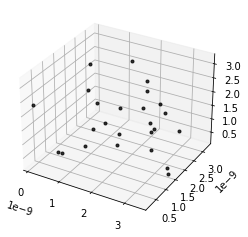

In [158]:
fig = plt.figure()
ax = plt.axes(projection='3d')
xdata = positions[:,0]
ydata = positions[:,1]
zdata = positions[:,2]
ax.plot3D(xdata, ydata, zdata, 'k.',alpha=.8)

In [147]:
print(xdata)
print(ydata)
print(zdata)

[2.56788231e-09 6.08530305e-10 2.75880375e-09 8.60587613e-10
 3.39441859e-09 1.18277576e-09 1.42710710e-09 1.22002779e-09
 2.29774588e-09 2.26969143e-09]
[1.01696588e-10 3.15965861e-09 2.16879174e-09 4.96935605e-10
 3.15083443e-09 2.47972132e-09 1.76792536e-09 2.02218705e-09
 1.84327621e-09 1.01374158e-09]
[2.90372037e-09 1.16073460e-09 2.60626044e-09 2.81172556e-09
 6.08186681e-10 1.04002943e-10 1.91596399e-10 3.31134997e-10
 1.23822621e-09 2.89049240e-09]
